<img src=https://api-manager.universia.net/coreplatform-document-management/api/document-management/public/6ra7ymjkfi64845 width="300" align="left">
<br />

# Aprendizaje automático I
#### <font color=green>*Máster en Informática Industrial y Robótica*</font>

Daniel Vidal Soroa  
Juan Diego Peña 

## Clasificación de mangos en tres clases según su presencia para la exportación, comercio local o procesamiento industrial

#### Importación de las librerías:

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import shuffle
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, classification_report, multilabel_confusion_matrix,ConfusionMatrixDisplay,confusion_matrix, recall_score,precision_score,f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from random import seed
from random import randint
from tensorflow import keras
from keras import layers, models, utils, datasets
from keras import utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from sklearn.cluster import SpectralClustering
from sklearn.utils import shuffle
import json

#### Lectura de los datos:

In [24]:
IMG_SIZE = 32

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical")
])

# seed random number generator
seed(1)

# Dimensión de entrada de las imágenes 
h = IMG_SIZE
w = IMG_SIZE


# Leer los nombres de las imágenes para importarlas
input_class1_path = "./Dataset/Grading_dataset/Class_I"
class1_names = os.listdir(input_class1_path)
input_class2_path = "./Dataset/Grading_dataset/Class_II"
class2_names = os.listdir(input_class2_path)
input_classex_path = "./Dataset/Grading_dataset/Extra_Class"
class3_names = os.listdir(input_classex_path)

# Número de elementos en cada clase
n = len(class1_names)


# Definir listas para cargar imágenes
class1 = np.ones([n, h, w, 3])
class2 = np.ones([n, h, w, 3])
class3 = np.ones([n, h, w, 3])
t1=np.zeros(n)
t2=np.ones(n)
t3=np.ones(n) +1




for i in range(0, n, 1):
    # Para cada clase, se lee una imágen, se importa
    img = resize(imread("./Dataset/Grading_dataset/Class_I/" + class1_names[i]), (h, w))
    class1[i] = img
     
    img = resize(imread("./Dataset/Grading_dataset/Class_II/" + class2_names[i]), (h, w))
    class2[i] = img
    
    img = resize(imread("./Dataset/Grading_dataset/Extra_Class/" + class3_names[i]), (h, w))
    class3[i] = img
     
class1,class2,class3 = shuffle(class1,class2,class3)
X = np.zeros([n*3,h*w*3])
t = np.zeros(n*3)
X[0:200] = class3[0:200].reshape((n,h*w*3))
X[200:400] = class1[0:200].reshape(n,h*w*3)
X[400:600] = class2[0:200].reshape(n,h*w*3)
t[0:200] = t1
t[200:400] = t2 
t[400:600] = t3
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.33, random_state=42) 
%store -r scoring CV 




In [25]:
clustering = SpectralClustering(n_clusters=3,eigen_solver="arpack",affinity="nearest_neighbors")
param_grid = {
   "eigen_solver":["arpack", "lobpcg", "amg"],
   "assign_labels":["kmeans","discretize"], 
   "n_clusters":[3]     
}
search = GridSearchCV(estimator = clustering, param_grid =param_grid, n_jobs=-1,cv=CV,scoring=scoring,refit=False)
results = search.fit(X_train)
params = results.cv_results_["params"]
df = pd.DataFrame.from_dict(results.cv_results_)
df.to_excel("./informe/tables/parameters_clustering.xlsx") 
Clases=['Clase extra','Clase I','Clase II']
data_recall =[]
data_precision = []
data_f1 =[]
data_accuracy = []
data_roc_auc  =[]
for param in params:
   clustering=SpectralClustering(**param)
   clustering.fit(X_train)
   y_pred=clustering.fit_predict(X_test)
   data_recall.append(recall_score(y_test,y_pred,average="macro"))
   data_precision.append(precision_score(y_test,y_pred,average="macro"))
   data_f1.append(f1_score(y_test,y_pred,average="macro"))
   data_accuracy.append(accuracy_score(y_test,y_pred))
  
   







# y_pred =clustering.fit_predict(X_test)
# Clases=['Clase extra','Clase I','Clase II']
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Clases)
# disp.plot()


c:\Python38\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

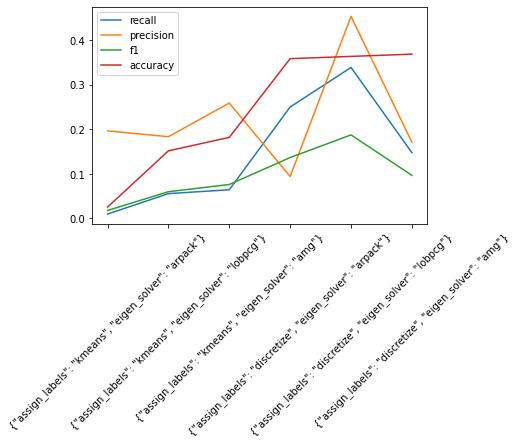

In [31]:
labels = []
for param in params:
    labels.append(json.dumps(param))
plt.plot(labels, data_recall, label = "recall",)
plt.plot(labels, data_precision, label = "precision")
plt.plot(labels, data_f1, label = "f1")
plt.plot(labels, data_accuracy, label = "accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Text(0, 0.5, 'Clase real')

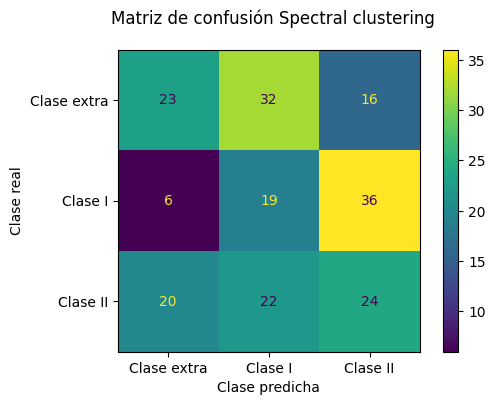

In [41]:

#Entrenamiento con modelo final y resultados
clustering = SpectralClustering(n_clusters=3,eigen_solver="lobpcg",affinity="nearest_neighbors",assign_labels="discretize")
clustering.fit(X_train)

y_pred=clustering.fit_predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_pred=y_pred,y_true=y_test,display_labels=Clases)
disp.figure_.suptitle("Matriz de confusión Spectral clustering")                                           # Añade un título a la figura de la matriz de confusión
disp.figure_.set_dpi(100)                                                                                  # Establece el tamaño de la figura
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")



In [42]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]

specificity_score = tn / (tn + fp)

print("recall: "+str(recall_score(y_test,y_pred,average='macro')))
print("precission:"+str(precision_score(y_test,y_pred,average='macro')))
print("f1:"+str(f1_score(y_test,y_pred,average='macro')))
print("accuracy:"+str(accuracy_score(y_test,y_pred)))    
# print("roc_auc:"+str(roc_auc_score(y_test,modeLDA.predict_proba(x_val),multi_class='ovr')))
print("specificity: "+ str(np.mean(specificity_score)))

recall: 0.3330184784814201
precission:0.3484837337963304
f1:0.33498119729988557
accuracy:0.3333333333333333
specificity: 0.6690585375567272
